In [22]:
import numpy as np
from skimage import io
import scrape_structure as ss
import matplotlib.pyplot as plt

import requests
import os
from bs4 import BeautifulSoup
import re
from collections import defaultdict
import random
import json
import sys

%matplotlib inline

This runs the Mondrian Scraper (Will take a while)

In [9]:
mondrian_artwork = ss.scrape_mondrian_artwork()

Otherwise load in the collection

In [17]:
art = json.load(open('artwork.json'))

In [90]:
from scipy import ndimage
from skimage.color import rgb2hsv
from skimage.color import rgb2gray

#Image resolution
def resolution(p):
    return p.shape[0]*p.shape[1]

def mean_saturation(p):
    hsv = rgb2hsv(p)
    sat = hsv[:,:,1]
    return np.mean(sat)

def mean_brightness(painting):
    hsv = rgb2hsv(painting)
    bright = hsv[:,:,2]
    return np.mean(bright)

def edge_score(painting, isGray=True):
    if not isGray:
        painting = rgb2gray(painting)
        
    edges = ndimage.gaussian_gradient_magnitude(painting,sigma=1)
    plt.imshow(edges, cmap='gray')
    
    rows, cols = painting.shape
    
    row_avg = 0
    for r in range(rows):
        row_avg += sum(edges[r,:])
    row_avg /= rows
    
    col_avg = 0
    for c in range(cols):
        col_avg += sum(edges[:,c])
    col_avg /= cols
    
    
    return max(row_avg, col_avg)
    
def per_row_grayscale_var(painting, isGray=True, avg=False):
    if not isGray:
        painting = rgb2gray(painting)
        
    rows = painting.shape[0]
    row_variances = []
    
    for i in range(rows):
        row_variances.append(np.var(painting[i,:]))
    
    if avg:
        return np.mean(np.array(row_variances))
    
    return np.array(row_variances)

In [122]:
mondrian_image = io.imread(mondrian_artwork['1920'][1]['url'])

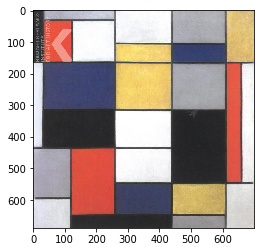

In [123]:
plt.imshow(mondrian_image)

Resolution is: 486500
Mean saturation is: 0.3941829774298602
Mean brightness is: 0.5446761703242445
Grayscale variance is: 0.0586306232228332
Average per-row grayscale variance is: 0.049279353122457105
My edge score for this image is: 8.61869406456881


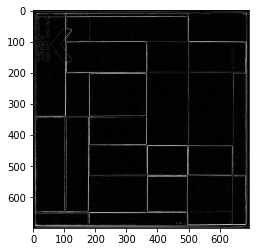

In [91]:
#Compute resolution (pixel count), mean saturation, mean brightness.
print("Resolution is:", resolution(mondrian_image))
print('Mean saturation is:', mean_saturation(mondrian_image))
print('Mean brightness is:', mean_brightness(mondrian_image))


#Compute the grayscale variance (Value in the HSV image) for your painting.
print("Grayscale variance is:", np.var(rgb2gray(mondrian_image)))

#Compute the per-row grayscale variance, and average per-row
#print("Per-row grayscale variance is:", per_row_grayscale_var(rgb2gray(mondrian_image)))
print("Average per-row grayscale variance is:", per_row_grayscale_var(mondrian_image,isGray=False, avg=True))

#Approximate edge score
print("My edge score for this image is:", edge_score(mondrian_image, isGray=False))

## Stats across all images

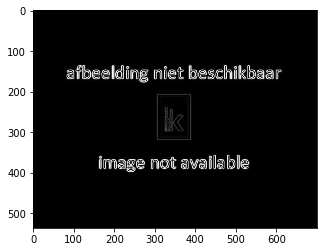

In [111]:
#Plot histograms of the above stats (resolution, mean brightness, mean saturation, 
#average per-row grayscale variance, and edge score) across your set of scraped images.
all_res = []
all_bright = []
all_sat = []
all_gray_var = []
all_edge = []

for year,v in mondrian_artwork.items():
    
    if int(year) < 1800:
        continue
    
    for p in mondrian_artwork[k]:
        img = io.imread(p['url'])
        all_res.append(resolution(img))
        all_bright.append(mean_brightness(img))
        all_sat.append(mean_saturation(img))
        all_gray_var.append(per_row_grayscale_var(img, isGray=False, avg=True))
        all_edge.append(edge_score(img, isGray=False))
        

(array([136.]), array([375899.5, 375900.5]), <a list of 1 Patch objects>)

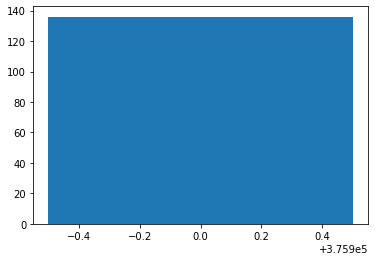

In [112]:
plt.hist(all_res, bins=1)

(array([  0.,   0.,   0.,   0.,   0., 136.,   0.,   0.,   0.,   0.]),
 array([0.47382887, 0.57382887, 0.67382887, 0.77382887, 0.87382887,
        0.97382887, 1.07382887, 1.17382887, 1.27382887, 1.37382887,
        1.47382887]),
 <a list of 10 Patch objects>)

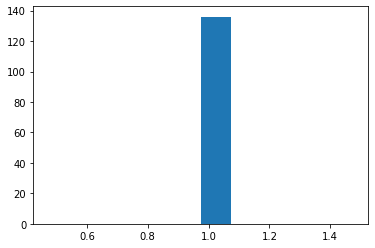

In [113]:
plt.hist(all_bright)

(array([  0.,   0.,   0.,   0.,   0., 136.,   0.,   0.,   0.,   0.]),
 array([-0.48249042, -0.38249042, -0.28249042, -0.18249042, -0.08249042,
         0.01750958,  0.11750958,  0.21750958,  0.31750958,  0.41750958,
         0.51750958]),
 <a list of 10 Patch objects>)

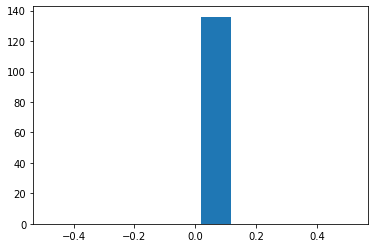

In [114]:
plt.hist(all_sat)

(array([  0.,   0.,   0.,   0.,   0., 136.,   0.,   0.,   0.,   0.]),
 array([-0.48570834, -0.38570834, -0.28570834, -0.18570834, -0.08570834,
         0.01429166,  0.11429166,  0.21429166,  0.31429166,  0.41429166,
         0.51429166]),
 <a list of 10 Patch objects>)

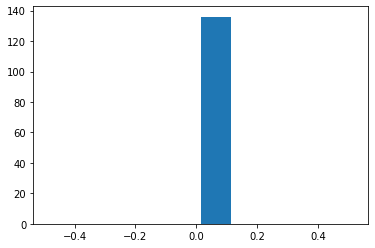

In [115]:
plt.hist(all_gray_var)

(array([  0.,   0., 136.,   0.,   0.]),
 array([7.13787713, 7.33787713, 7.53787713, 7.73787713, 7.93787713,
        8.13787713]),
 <a list of 5 Patch objects>)

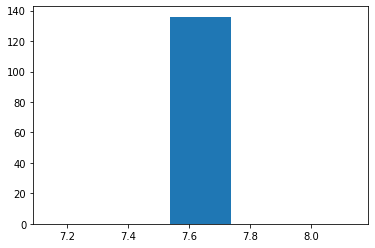

In [121]:
plt.hist(all_edge, bins=5)